In [1]:
import pandas as pd
import matplotlib

In [2]:
df = pd.read_csv('/content/olympic.csv')

In [3]:
df

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver
...,...,...,...,...,...,...,...,...,...
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze


In [4]:
df.isnull().sum()

Year          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

# 1. In how many cities Summer Olympics is held so far?

In [5]:
df['City'].unique()

array(['Athens', 'Paris', 'St Louis', 'London', 'Stockholm', 'Antwerp',
       'Amsterdam', 'Los Angeles', 'Berlin', 'Helsinki',
       'Melbourne / Stockholm', 'Rome', 'Tokyo', 'Mexico', 'Munich',
       'Montreal', 'Moscow', 'Seoul', 'Barcelona', 'Atlanta', 'Sydney',
       'Beijing'], dtype=object)

In [6]:
print ("Summer Olympics are held in ",len(df['City'].unique())," cities so far. ")

Summer Olympics are held in  22  cities so far. 


# 2. Which sport is having most number of Gold Medals so far?(Top 5)

Aquatics      1421
Athletics     1215
Rowing         890
Gymnastics     820
Fencing        552
Name: Sport, dtype: int64


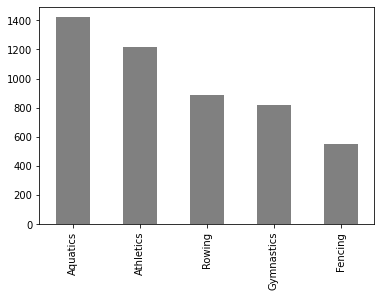

In [7]:
Max_gold_medals = df.Sport[df.Medal== "Gold"].value_counts()
data= Max_gold_medals.head()
print(data)
data.plot(x= "Sport", y="Medal", kind="bar",color="grey")


# 3. Which sport is having most number of medals so far?(Top 5)

In [8]:
most_medals= df.groupby("Sport").count()["Medal"].head().sort_values(ascending= False)
most_medals


Sport
Aquatics     4170
Athletics    3638
Baseball      335
Archery       329
Badminton     144
Name: Medal, dtype: int64

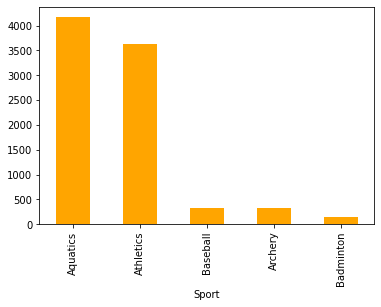

In [9]:
most_medals.plot(x="Sport",y="Medal", kind="bar",color="orange")

# 4. Which player  has won most number of medals?(Top 5)

In [10]:
player_won_most_medals= df.groupby("Athlete").count()["Medal"].sort_values(ascending= False).head()
player_won_most_medals


Athlete
PHELPS, Michael         22
LATYNINA, Larisa        18
ANDRIANOV, Nikolay      15
MANGIAROTTI, Edoardo    13
SHAKHLIN, Boris         13
Name: Medal, dtype: int64

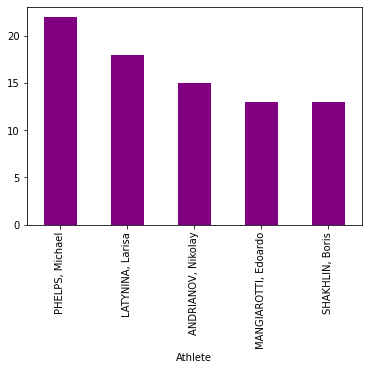

In [11]:
player_won_most_medals.plot.bar(color="purple")


# 5. Which player has won most number of Gold Medals of medals?(Top 5)

PHELPS, Michael     18
SPITZ, Mark          9
LATYNINA, Larisa     9
NURMI, Paavo         9
LEWIS, Carl          9
Name: Athlete, dtype: int64


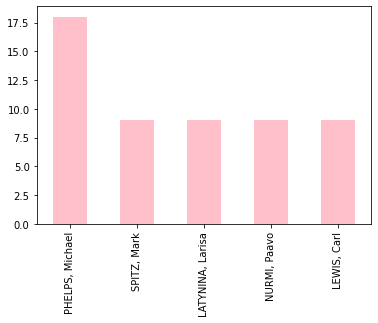

In [12]:
gold_medals = df.Athlete[df.Medal== "Gold"].value_counts()
data_1= gold_medals.head()
print(data_1)

data_1.plot(x= "Athlete", y="Medal", kind="bar",color='pink')




# 6. In which year India won first Gold Medal in Summer Olympics?

In [13]:
df_gold= df[df['Medal']=='Gold']
df_year= df_gold.sort_values(['Year'],ascending= True)
indias_first_gold_medal= df_year[df_year['Country']=='IND'].iloc[0]
print ("The year India won its first Gold Medal in Summer Olympics is",indias_first_gold_medal['Year'])

The year India won its first Gold Medal in Summer Olympics is 1928


# 7. Which event is most popular in terms on number of players?(Top 5)

In [14]:
most_popular_events= df[(df.Event !=0)&(df.Athlete !=0)][['Event','Athlete']]
most_popular_events= most_popular_events.groupby('Event').count().reset_index()


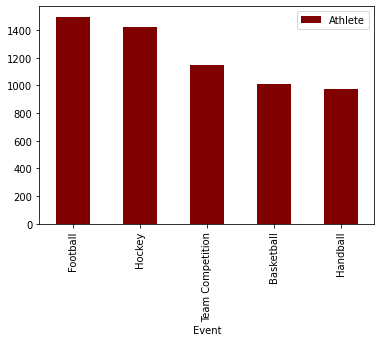

In [15]:
most_popular_events=most_popular_events.sort_values(by= 'Athlete',ascending= False).head().plot(x='Event',y='Athlete',kind='bar', color= 'maroon')

# 8. Which sport is having most female Gold Medalists? (Top 5)

In [17]:
Player_gold_female= df_gold[df_gold['Gender']== 'Women']


In [18]:
Player_gold_female

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
417,1900,Paris,Golf,Golf,"ABBOTT, Margaret Ives",USA,Women,Individual,Gold
641,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Mixed Doubles,Gold
649,1900,Paris,Tennis,Tennis,"COOPER, Charlotte",GBR,Women,Singles,Gold
710,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double Columbia Round (50Y - 40Y - 30Y),Gold
713,1904,St Louis,Archery,Archery,"HOWELL, Matilda Scott",USA,Women,Double National Round (60Y - 50Y),Gold
...,...,...,...,...,...,...,...,...,...
31081,2012,London,Weightlifting,Weightlifting,"VALENTIN PEREZ, Lidia",ESP,Women,75KG,Gold
31097,2012,London,Wrestling,Wrestling Freestyle,"OBARA, Hitomi",JPN,Women,Wf 48 KG,Gold
31105,2012,London,Wrestling,Wrestling Freestyle,"YOSHIDA, Saori",JPN,Women,Wf 55 KG,Gold
31113,2012,London,Wrestling,Wrestling Freestyle,"ICHO, Kaori",JPN,Women,Wf 63 KG,Gold


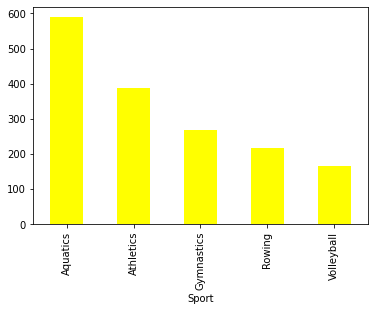

In [19]:
data_2= Player_gold_female.groupby("Sport").count()["Gender"].sort_values(ascending = False).head().plot.bar(x='Athlete',y='Medal',color="yellow")